In [1]:
# Importing the libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import kaleido

D:\Coursera\Ananconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [22]:
# Importing the dataset
df = pd.read_csv('Datasets/model_dataset2008-18.csv')

D:\Coursera\Ananconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [15]:
# Checking if import worked
df

,Date,FIRE_SIZE_CLASS,FIRE_SIZE,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,NWCG_GENERAL_CAUSE,CONT_DATE,LATITUDE,...,STATE,tavg,tmin,tmax,prcp,snow,wspd,pres,Station,Station_id
0,2008-04-07,N,0.0,904,Huron-Manistee National Forest,2008,2008-04-08,Missing data/not specified/undetermined,2008-04-08,44.566389,...,MI,8.3,2.2,12.2,0.0,0.0,19.1,1013.0,Muskegon County Airport,72636
1,2008-04-08,A,0.1,904,Huron-Manistee National Forest,2008,2008-04-08,Missing data/not specified/undetermined,2008-04-08,44.566389,...,MI,6.2,2.8,10.0,8.6,0.0,12.2,1017.5,Muskegon County Airport,72636
2,2008-01-08,A,0.1,804,Cherokee National Forest,2008,2008-01-08,Arson/incendiarism,2008-01-08,36.412222,...,TN,11.3,1.1,21.7,0.0,0.0,7.9,1020.4,Bristol / Holston,72335
3,2008-01-02,N,0.0,807,National Forests in Mississippi,2008,2008-01-04,Recreation and ceremony,2008-01-05,30.929167,...,MS,1.1,-3.3,5.0,0.0,0.0,15.5,1039.6,Hattiesburg / Mars Hill,74759
4,2008-01-03,N,0.0,807,National Forests in Mississippi,2008,2008-01-04,Recreation and ceremony,2008-01-05,30.929167,...,MS,-1.0,-6.7,6.1,0.0,0.0,4.7,1042.0,Hattiesburg / Mars Hill,74759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144531,2018-11-17,A,0.1,CTCTS,Connecticut Division of Forestry,2018,2018-11-17,Missing data/not specified/undetermined,2018-11-17,41.885375,...,CT,4.1,2.2,6.1,0.0,0.0,10.8,1020.4,Oxford / Southford,KOXC0
1144532,2018-12-11,N,0.0,CTCTS,Connecticut Division of Forestry,2018,2018-12-12,Missing data/not specified/undetermined,2018-12-12,41.985374,...,CT,-2.9,-9.4,2.2,0.0,0.0,4.3,1019.7,Oxford / Southford,KOXC0
1144533,2018-12-12,A,0.1,CTCTS,Connecticut Division of Forestry,2018,2018-12-12,Missing data/not specified/undetermined,2018-12-12,41.985374,...,CT,-1.1,-3.3,2.2,0.0,0.0,11.6,1020.2,Oxford / Southford,KOXC0
1144534,2018-04-22,N,0.0,CTCTS,Connecticut Division of Forestry,2018,2018-04-23,Missing data/not specified/undetermined,2018-04-23,41.435494,...,CT,9.7,1.7,15.6,0.0,0.0,14.7,1029.4,Oxford / Southford,KOXC0


# Numerical Analysis

I am performing the descriptive statistics for the numerical columns and counting the total number of unique values present in the categorical columns.

In [4]:
# Descriptive statistics for numerical columns
numerical_summary = df.describe()

# Count of unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
unique_counts = df[categorical_columns].nunique()

numerical_summary, unique_counts


(          FIRE_SIZE     FIRE_YEAR      LATITUDE     LONGITUDE          tavg  \
 count  1.144536e+06  1.144536e+06  1.144536e+06  1.144536e+06  1.144307e+06   
 mean   7.620608e+02  2.013016e+03  4.103895e+01 -1.055192e+02  1.704467e+01   
 std    9.649255e+03  3.166621e+00  6.832912e+00  1.744618e+01  8.483572e+00   
 min    0.000000e+00  2.008000e+03  1.795528e+01 -1.644497e+02 -4.320000e+01   
 25%    0.000000e+00  2.010000e+03  3.584972e+01 -1.180978e+02  1.190000e+01   
 50%    0.000000e+00  2.013000e+03  4.069750e+01 -1.100644e+02  1.770000e+01   
 75%    8.900000e-01  2.016000e+03  4.585537e+01 -8.909392e+01  2.320000e+01   
 max    5.581983e+05  2.018000e+03  6.840936e+01 -6.527361e+01  4.180000e+01   
 
                tmin          tmax          prcp          snow          wspd  \
 count  1.144536e+06  1.144536e+06  1.144536e+06  1.144536e+06  1.144536e+06   
 mean   9.497718e+00  2.452170e+01  4.492427e-01  2.220832e+00  1.091503e+01   
 std    8.313767e+00  9.317710e+00  2.

In [17]:
# Creating a subset
category_counts = df['FIRE_SIZE_CLASS'].value_counts()

# Create a DataFrame to display the counts
counts_df = pd.DataFrame(category_counts)
counts_df.columns = ['Count']

print(counts_df)

    Count
N  576118
A  221871
B  188191
C   66322
F   23650
D   23604
G   22907
E   21873


# Graphical Analysis
The following is the graphical analysis for the dataset. This will give a breif idea of the distribution of data and revel any hidden relations.

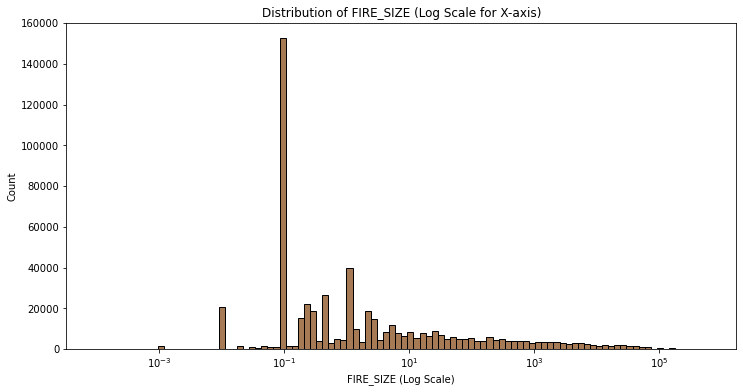

In [4]:
# Fire size log
color_to_use = "#8A4D1E"

# Plotting the distributi1on of FIRE_SIZE with log scale for x-axis
plt.figure(figsize=(12, 6))
sns.histplot(df[df['FIRE_SIZE'] > 0]['FIRE_SIZE'], bins=100, log_scale=True, color=color_to_use)
plt.title("Distribution of FIRE_SIZE (Log Scale for X-axis)")
plt.xlabel("FIRE_SIZE (Log Scale)")
plt.ylabel("Count")
plt.savefig("Plots/Fires_size_log.png", dpi=500,transparent=True)

plt.show()


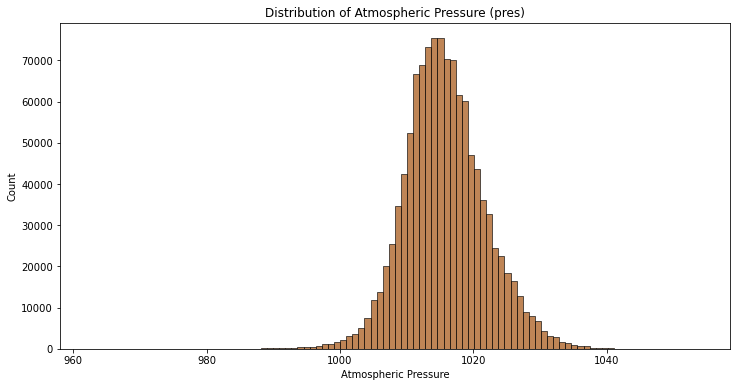

In [5]:
# Plotting the distribution of atmospheric pressure (pres)
color_to_use = "#AA5C1E"  # Replace with your desired color

plt.figure(figsize=(12, 6))
sns.histplot(df['pres'], bins=100, color=color_to_use)
plt.title("Distribution of Atmospheric Pressure (pres)")
plt.xlabel("Atmospheric Pressure")
plt.ylabel("Count")
plt.savefig("Plots/Pres_Histogram.png", dpi=500,transparent=True)

plt.show()


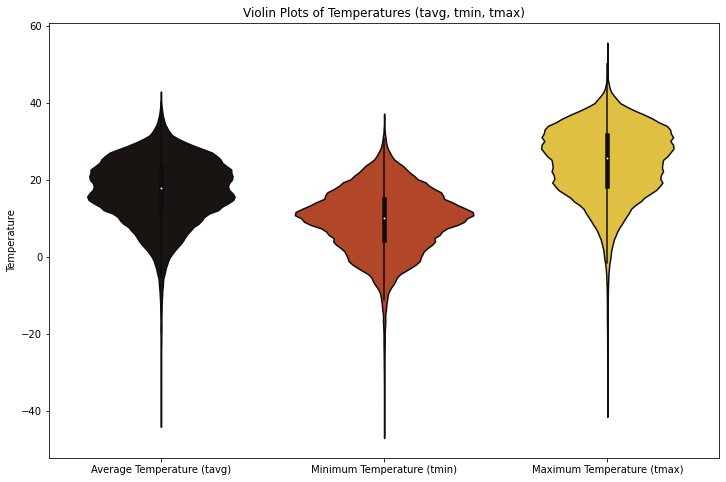

In [6]:
# Choosing the meteorological values
data_to_plot = [df['tavg'].dropna(), df['tmin'].dropna(), df['tmax'].dropna()]

color_palette = ["#1B140F", "#C93912", "#FAD028"]  # Choosing palette

plt.figure(figsize=(12, 8))
sns.violinplot(data=data_to_plot, palette=color_palette)

# Setting titles and labels
plt.title("Violin Plots of Temperatures (tavg, tmin, tmax)")
plt.xticks([0, 1, 2], ['Average Temperature (tavg)', 'Minimum Temperature (tmin)', 'Maximum Temperature (tmax)'])
plt.ylabel("Temperature")

# Save the plot with a higher resolution 
plt.savefig("Plots/Temp_Violin_Plots.png", dpi=500,transparent=True)  

plt.show()

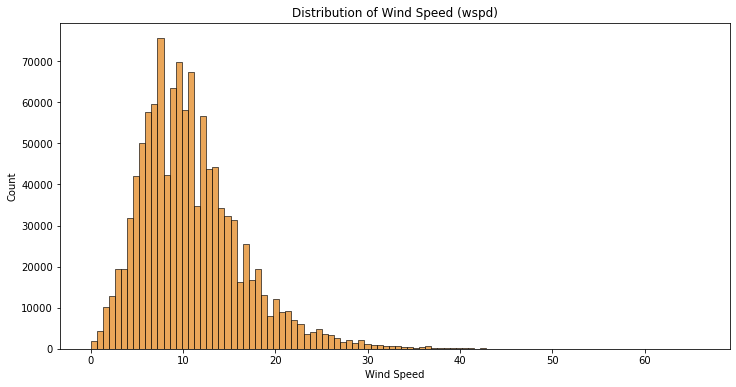

In [7]:
color_to_use = "#E48921"
# Plotting the distribution of wind speed (wspd)
plt.figure(figsize=(12, 6))
sns.histplot(df['wspd'], bins=100, color=color_to_use)
plt.title("Distribution of Wind Speed (wspd)")
plt.xlabel("Wind Speed")
plt.ylabel("Count")
plt.savefig("Plots/Wind_Histogram.png", dpi=500,transparent=True)
plt.show()


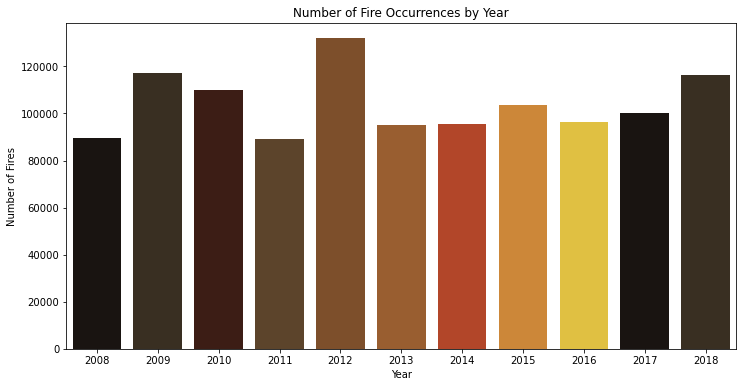

In [8]:
# Define the gradient palette
custom_palette = ["#1B140F", "#3D301E", "#43190E", "#644423", "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FIRE_YEAR', palette=custom_palette)
plt.title("Number of Fire Occurrences by Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.savefig("Plots/Fire_Occurances.png", dpi=500,transparent=True)

plt.show()


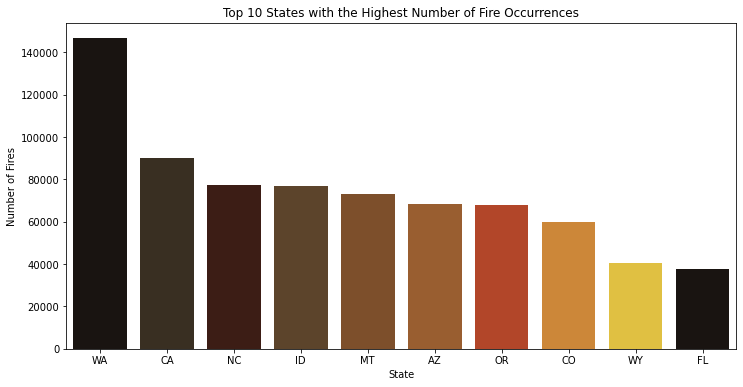

In [9]:
custom_palette = ["#1B140F", "#3D301E", "#43190E", "#644423", "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"]
# Plotting the top 10 states with the highest number of fire occurrences
plt.figure(figsize=(12, 6))
state_counts = df['STATE'].value_counts().head(10)
sns.barplot(x=state_counts.index, y=state_counts.values, palette=custom_palette)
plt.title("Top 10 States with the Highest Number of Fire Occurrences")
plt.xlabel("State")
plt.ylabel("Number of Fires")
plt.savefig("Plots/Number_of_Occurences.png", dpi=500,transparent=True)

plt.show()


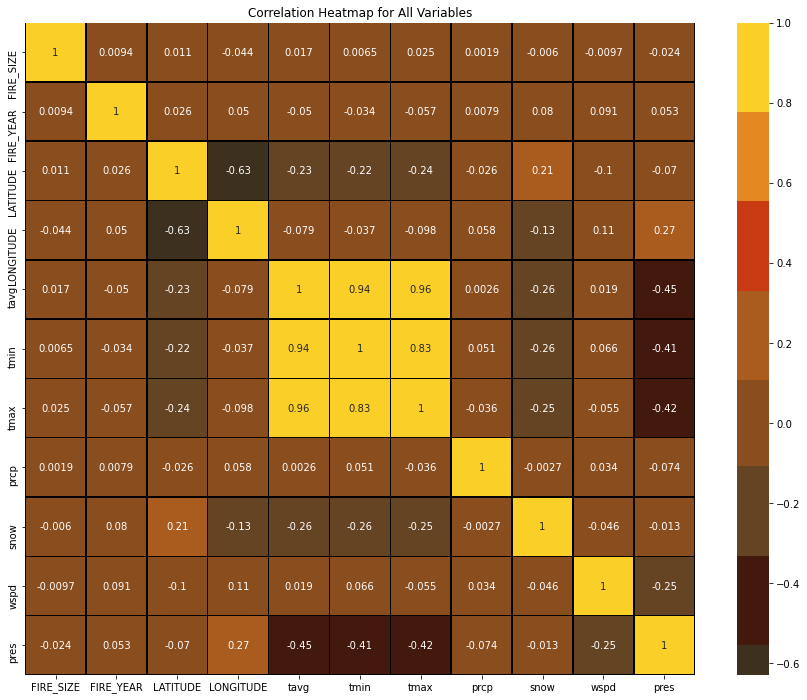

In [10]:

# Calculating the correlation for all variables
custom_palette = ["#1B140F", "#3D301E", "#43190E", "#644423", "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"]

all_variables_correlation = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(all_variables_correlation, annot=True, cmap=custom_palette, center=0, linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap for All Variables")
plt.savefig("Plots/Corr_Heatmap.png", dpi=500,transparent=True)

plt.show()


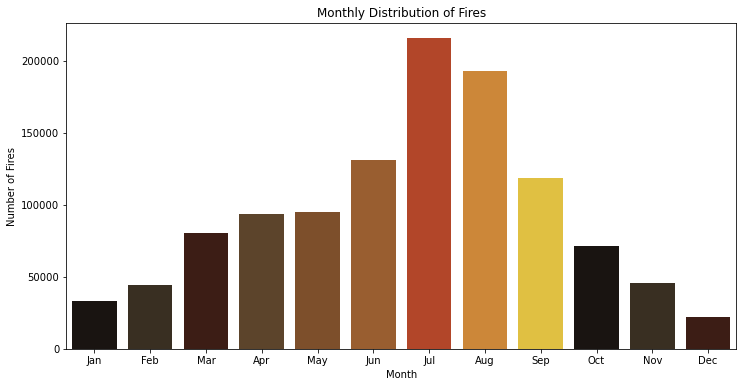

In [11]:
# Extracting the month from the Date column
df['Month'] = pd.to_datetime(df['Date']).dt.month
custom_palette = ["#1B140F", "#3D301E", "#43190E", "#644423", "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"]

# Plotting the monthly distribution of fires
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month', palette=custom_palette, order=range(1,13))
plt.title("Monthly Distribution of Fires")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig("Plots/Montly_Distribution.png", dpi=500,transparent=True)

plt.show()


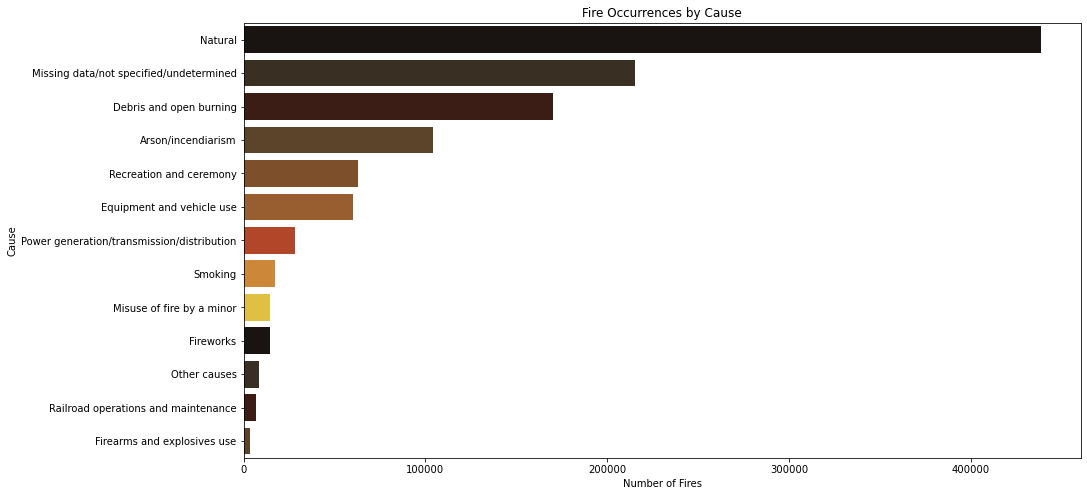

In [12]:
custom_palette = ["#1B140F", "#3D301E", "#43190E", "#644423", "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"]

# Plotting the distribution of fire occurrences by their cause
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y='NWCG_GENERAL_CAUSE', palette=custom_palette, order=df['NWCG_GENERAL_CAUSE'].value_counts().index)
plt.title("Fire Occurrences by Cause")
plt.xlabel("Number of Fires")
plt.ylabel("Cause")
plt.savefig("Plots/Fire_Causes.jpeg", dpi=500,transparent=True)

plt.show()


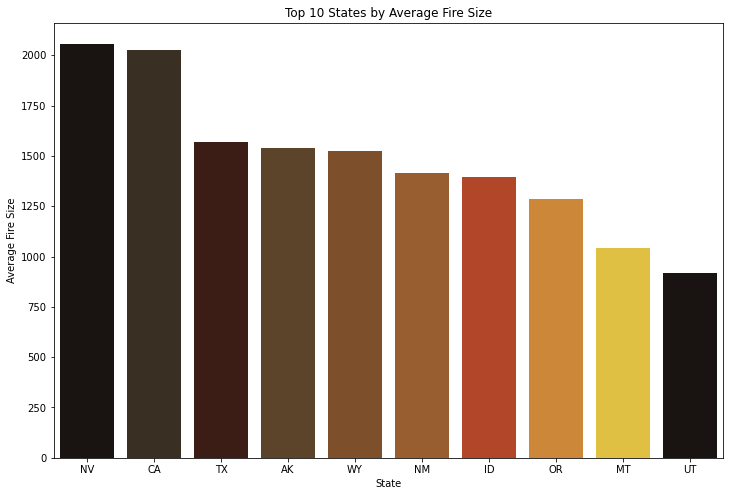

In [16]:
# Calculating the average fire size by state
avg_fire_size_by_state = df.groupby('STATE')['FIRE_SIZE'].mean().sort_values(ascending=False)
custom_palette = ["#1B140F", "#3D301E", "#43190E", "#644423", "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"]

# Plotting the average fire size by state for the top 10 states
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_fire_size_by_state.head(10).index, y=avg_fire_size_by_state.head(10).values, palette=custom_palette)
plt.title("Top 10 States by Average Fire Size")
plt.xlabel("State")
plt.ylabel("Average Fire Size")

plt.savefig("Plots/Avg_Fire_Size.png", dpi=500,transparent=True)

plt.show()


Creating a subset for the next plot.

In [15]:
# Calculating the average wind speed by fire size class
avg_wind_by_size_class = df.groupby('FIRE_SIZE_CLASS')['wspd'].mean()

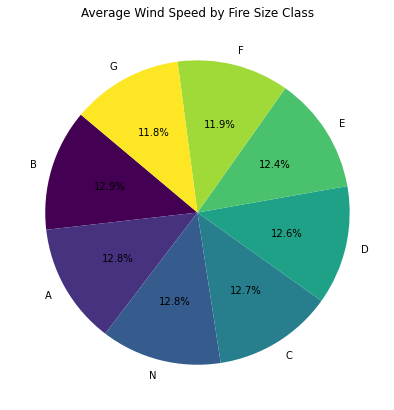

In [16]:
# Plotting the average wind speed by fire size class as a pie chart
plt.figure(figsize=(10, 7))
avg_wind_by_size_class.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="viridis")
plt.title("Average Wind Speed by Fire Size Class")
plt.ylabel("")  # Removing the y-label for clarity
plt.show()

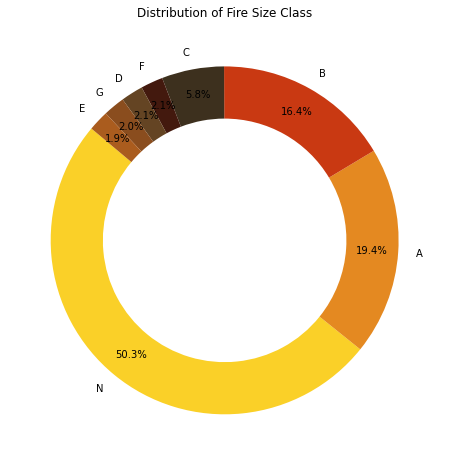

In [17]:
# Define the custom gradient palette
custom_palette = ["#FAD028","#E48921" ,"#C93912", "#3D301E", "#43190E", "#644423", "#8A4D1E", "#AA5C1E" ]

fire_size_class_distribution = df['FIRE_SIZE_CLASS'].value_counts()

# Plotting the distribution of fire_size_class as a pie chart with custom colors
plt.figure(figsize=(12, 8))
plt.pie(fire_size_class_distribution, labels=fire_size_class_distribution.index, autopct='%1.1f%%', startangle=140, 
        colors=custom_palette, wedgeprops=dict(width=0.3), pctdistance=0.85, labeldistance=1.1)
plt.title("Distribution of Fire Size Class")
plt.ylabel("")  # Removing the y-label for clarity
plt.savefig("Plots/Class_Distribution.png", dpi=500,transparent=True)

plt.show()

In [25]:
# Sample data: Replace this with your actual data
state_codes = avg_fire_size_by_state.index.values # List of US state codes
fire_sizes = avg_fire_size_by_state.values       # Corresponding fire sizes

# Create a DataFrame with state data
fdata = {'state_code': state_codes, 'fire_sizes': fire_sizes}
data = pd.DataFrame(fdata)

# Define the colorscale (yellow to red)
scl = colors = [
    "#1B140F", "#3D301E", "#43190E", "#644423",
    "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"
]

# Create the choropleth map
choropleth = go.Choropleth(
    locations=data['state_code'],
    locationmode='USA-states',
    z=data['fire_sizes'].astype(float),
    zmin=0,
    zmax=max(data['fire_sizes'].astype(float)),
    colorscale=scl,
    autocolorscale=False,
    text='Fire Sizes',
    marker_line_color='white',
    colorbar_title="Average Fire Sizes (acres)"
)

# Create the figure and update layout
fig = go.Figure(data=choropleth)
fig.update_layout(
    title_text='US States by average forest fire sizes',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgba(0,0,0,0)',  # This sets the lake color to transparent
        landcolor='rgba(0,0,0,0)', # This sets the land color to transparent
        bgcolor='rgba(0,0,0,0)'    # This sets the geographic background color to transparent
    ),
    plot_bgcolor='rgba(0,0,0,0)',   # This sets the plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)',
)
fig.add_scattergeo(
    locations=data['state_code'],
    locationmode="USA-states",
    text=data['state_code'],
    mode='text',
    textfont=dict(color='white')
)
fig.write_image('Plots/State_by_FireSize.png', scale=7)
# Show the plot
fig.show()

In [24]:
# Sample data: Replace this with your actual data
state_codes = df[df['FIRE_SIZE_CLASS'] != 'N']['STATE'].value_counts().index.values # List of US state codes
fire_sizes = df[df['FIRE_SIZE_CLASS'] != 'N']['STATE'].value_counts().values       # Corresponding fire sizes

# Create a DataFrame with state data
fdata = {'state_code': state_codes, 'fire_sizes': fire_sizes}
data = pd.DataFrame(fdata)

scl = colors = [ "#43190E", "#644423",
    "#8A4D1E", "#AA5C1E", "#C93912", "#E48921", "#FAD028"
]

# Create the choropleth map
choropleth = go.Choropleth(
    locations=data['state_code'],
    locationmode='USA-states',
    z=data['fire_sizes'].astype(float),
    zmin=0,
    zmax=max(data['fire_sizes'].astype(float)),
    colorscale=scl,
    autocolorscale=False,
    text='Fire Sizes',
    marker_line_color='white',
    colorbar_title="Fire Occurences"
)

# Create the figure and update layout
fig = go.Figure(data=choropleth)
fig.update_layout(
    title_text='Forest Fire Occurences in US States',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgba(0,0,0,0)',  # This sets the lake color to transparent
        landcolor='rgba(0,0,0,0)', # This sets the land color to transparent
        bgcolor='rgba(0,0,0,0)'    # This sets the geographic background color to transparent
    ),
    plot_bgcolor='rgba(0,0,0,0)',   # This sets the plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)',
)
fig.add_scattergeo(
    locations=data['state_code'],
    locationmode="USA-states",
    text=data['state_code'],
    mode='text',
    textfont=dict(color='white')
)
fig.write_image('Plots/State_by_FireOccurance.png', scale=7)  
# Show the plot
fig.show()
